import packages
=============================

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

calculate matrix's rank
===================
first we don't add noise

In [ ]:
A = np.random.randn(14,10)

ra = np.linalg.matrix_rank(A)
print(ra)

B = A
B[:,-1] = B[:,-2]
# print(B)

rb = np.linalg.matrix_rank(B)
print(rb)

10
9


now we add noise

In [ ]:
m = 10
A = np.round(10*np.random.randn(m, m))

# make duplicated column
A[:,-1] = A[:,-2]

noiseamp = 0.001

B = A + noiseamp*np.random.randn(m, m) # B is matrix with noisy

print(f"with noise: {np.linalg.matrix_rank(B)}, without {np.linalg.matrix_rank(A)}")

with noise: 10, without 9


rank of A+B and A * B
=====================
$$ rank(A + B) <= rank(A) + rank(B) $$
$$ rank(AB) <= min\{rank(A), rank(B)\}$$
$$rank(A) = rank(A^TA) = rank(A^T) = rank(AA^T)$$

In [ ]:
A = np.random.randn(10, 4)
B = np.random.randn(4, 10)
C = A@B
# print(np.shape(C))
print(np.linalg.matrix_rank(C))

m = 8
n = 47
r = 3

A = np.random.randn(m, r) @ np.random.randn(r, n)
print(np.linalg.matrix_rank(A))

4
3


shifting
==============
convert a rank-deficient matrix to full-rank matrix

In [7]:
m = 30

create the square symmetric matrix  
```numpy.random.randn``` generates samples from the normal distribution, while ```numpy.random.rand``` from a uniform distribution (in the range [0,1)).

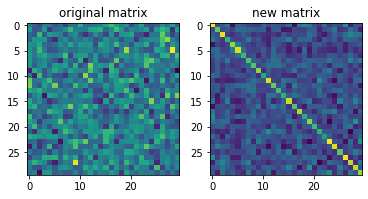

In [15]:
A = np.random.randn(m, m)
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title("original matrix")
A = np.round(10*A.T@A)
plt.subplot(1, 2, 2)
plt.imshow(A)
plt.title("new matrix")
plt.show()

reduce the rank

In [16]:
A[:, 0] = A[:, 1]

# shift amount
l = 0.01

B = A + l * np.eye(m, m)

print((np.linalg.matrix_rank(A), np.linalg.matrix_rank(B)))

(29, 30)


determine whether a vector is in the span of s set of vectors

In [20]:
v = np.array([[1, 2, 3, 4]]).T

S = np.vstack(([4, 3, 6, 2],[0, 4, 0, 1])).T
T = np.hstack(([4, 3, 6, 2],[0, 4, 0, 1])).T
print(S, T)

Sv = np.concatenate((S, v), axis=1)

print((np.linalg.matrix_rank(S), np.linalg.matrix_rank(Sv)))

[[4 0]
 [3 4]
 [6 0]
 [2 1]] [4 3 6 2 0 4 0 1]
(2, 3)
